## Explores the relationship between roughness and flow rate in a stormwater network.

In [14]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute, SubcatchAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import numpy.random as nprnd
import time

# Local imports.
from urbansurge import swmm_model, analysis_tools

In [4]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\canandaigua_config_physical.yml"

In [5]:
# Create instance of SWMM model.
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2020-10-17 00:00:00
Start Time: 2020-11-16 23:55:00


In [7]:
# Roughness settings.
link_id = 6
roughness_values = np.arange(0.01, 0.06, 0.01)
print(roughness_values)

[0.01 0.02 0.03 0.04 0.05]


In [9]:
# List of output data frames.
output_df_list = []


# Run the simulation with different roughness settings.
for i, n in enumerate(roughness_values):
   
    # Update the link roughness.
    swmm.set_link_roughness(link_id, n)
    
    # Run the simulation.
    swmm.run_simulation()
    
    # OUTPUT TO DATA FRAME
    # ---------------------------------------------------------------------
    # Get the node depths.
    node_depth_df = swmm.get_node_depth()

    # Get node flooding.
    node_flood_df = swmm.get_node_flooding()
    
    # Get node inflow.
    node_total_inflow_df = swmm.get_node_total_inflow()

    # Get link flow.
    link_flow_df = swmm.get_link_flow()
    
    # Get link depth.
    link_depth_df = swmm.get_link_depth()
    
    # Get link velocity.
    link_velocity_df = swmm.get_link_velocity()

    # Get precipitation time series.
    prcp_df = swmm.get_rainfall_timeseries()

    # Join data frames.
    fault_df = node_depth_df.merge(node_flood_df, on='datetime')
    fault_df = fault_df.merge(node_total_inflow_df, on='datetime')
    fault_df = fault_df.merge(link_flow_df, on='datetime')
    fault_df = fault_df.merge(link_depth_df, on='datetime')
    fault_df = fault_df.merge(link_velocity_df, on='datetime')
    fault_df = fault_df.merge(prcp_df, on='datetime')

    # Add experiment name.
    fault_df['Experiment'] = f'E_{i}'
        
    # Add link roughness.
    fault_df[f'Link_{link_id}_n'] = n

    # Add to list.
    output_df_list.append(fault_df)

    # ---------------------------------------------------------------------
    
output_df = pd.concat(output_df_list)

Updated Roughness value to 0.01 for 6 in 6
Set Link 6 roughness to 0.01
INP PATH: C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\Canandaigua_physical_system_tmp.inp
2020-10-17 00:00:01 , 0
2020-10-17 00:50:01 , 0
2020-10-17 01:40:01 , 0
2020-10-17 02:30:01 , 0
2020-10-17 03:20:01 , 0
2020-10-17 04:10:01 , 1
2020-10-17 05:00:01 , 1
2020-10-17 05:50:01 , 1
2020-10-17 06:40:01 , 1
2020-10-17 07:30:01 , 1
2020-10-17 08:20:01 , 1
2020-10-17 09:10:01 , 1
2020-10-17 10:00:01 , 1
2020-10-17 10:50:01 , 1
2020-10-17 11:40:01 , 2
2020-10-17 12:30:01 , 2
2020-10-17 13:20:01 , 2
2020-10-17 14:10:01 , 2
2020-10-17 15:00:01 , 2
2020-10-17 15:50:01 , 2
2020-10-17 16:40:01 , 2
2020-10-17 17:30:01 , 2
2020-10-17 18:20:01 , 2
2020-10-17 19:10:01 , 3
2020-10-17 20:00:01 , 3
2020-10-17 20:50:01 , 3
2020-10-17 21:40:01 , 3
2020-10-17 22:30:01 , 3
2020-10-17 23:20:01 , 3
2020-10-18 00:10:01 , 3
2020-10-18 01:00:01 , 3
2020-10-18 01:50:01 , 3
2020-10-18 02:40:01 , 4
2020-10-18 03:30:01 

2020-10-30 23:48:31 , 45
2020-10-31 00:31:03 , 45
2020-10-31 01:16:01 , 45
2020-10-31 02:04:18 , 45
2020-10-31 02:54:18 , 46
2020-10-31 03:44:18 , 46
2020-10-31 04:34:18 , 46
2020-10-31 05:24:18 , 46
2020-10-31 06:14:18 , 46
2020-10-31 07:04:18 , 46
2020-10-31 07:54:18 , 46
2020-10-31 08:44:18 , 46
2020-10-31 09:34:18 , 46
2020-10-31 10:24:18 , 47
2020-10-31 11:14:18 , 47
2020-10-31 12:04:18 , 47
2020-10-31 12:54:18 , 47
2020-10-31 13:44:18 , 47
2020-10-31 14:34:18 , 47
2020-10-31 15:24:18 , 47
2020-10-31 16:14:18 , 47
2020-10-31 17:04:18 , 47
2020-10-31 17:54:18 , 48
2020-10-31 18:44:18 , 48
2020-10-31 19:34:18 , 48
2020-10-31 20:24:18 , 48
2020-10-31 21:14:18 , 48
2020-10-31 22:04:18 , 48
2020-10-31 22:54:18 , 48
2020-10-31 23:44:18 , 48
2020-11-01 00:34:18 , 48
2020-11-01 01:24:18 , 49
2020-11-01 02:14:18 , 49
2020-11-01 03:04:18 , 49
2020-11-01 03:54:18 , 49
2020-11-01 04:44:18 , 49
2020-11-01 05:34:18 , 49
2020-11-01 06:24:18 , 49
2020-11-01 07:14:18 , 49
2020-11-01 08:04:18 , 49


2020-11-11 09:29:11 , 82
2020-11-11 10:19:11 , 82
2020-11-11 11:09:11 , 82
2020-11-11 11:59:11 , 82
2020-11-11 12:49:11 , 82
2020-11-11 13:39:11 , 82
2020-11-11 14:29:11 , 83
2020-11-11 15:19:11 , 83
2020-11-11 16:09:11 , 83
2020-11-11 16:59:11 , 83
2020-11-11 17:49:11 , 83
2020-11-11 18:39:11 , 83
2020-11-11 19:29:11 , 83
2020-11-11 20:19:11 , 83
2020-11-11 21:09:11 , 83
2020-11-11 21:59:11 , 84
2020-11-11 22:49:11 , 84
2020-11-11 23:39:11 , 84
2020-11-12 00:29:11 , 84
2020-11-12 01:19:11 , 84
2020-11-12 02:09:11 , 84
2020-11-12 02:59:11 , 84
2020-11-12 03:49:11 , 84
2020-11-12 04:39:11 , 85
2020-11-12 05:29:11 , 85
2020-11-12 06:19:11 , 85
2020-11-12 07:09:11 , 85
2020-11-12 07:59:11 , 85
2020-11-12 08:49:11 , 85
2020-11-12 09:39:11 , 85
2020-11-12 10:29:11 , 85
2020-11-12 11:19:11 , 85
2020-11-12 12:09:11 , 86
2020-11-12 12:59:11 , 86
2020-11-12 13:49:11 , 86
2020-11-12 14:39:11 , 86
2020-11-12 15:29:11 , 86
2020-11-12 16:19:11 , 86
2020-11-12 17:09:11 , 86
2020-11-12 17:59:11 , 86


2020-10-22 18:07:42 , 19
2020-10-22 18:57:42 , 19
2020-10-22 19:47:42 , 19
2020-10-22 20:37:42 , 19
2020-10-22 21:27:42 , 19
2020-10-22 22:17:42 , 19
2020-10-22 23:07:42 , 19
2020-10-22 23:57:42 , 19
2020-10-23 00:47:42 , 19
2020-10-23 01:37:42 , 20
2020-10-23 02:27:42 , 20
2020-10-23 03:17:42 , 20
2020-10-23 04:07:42 , 20
2020-10-23 04:57:42 , 20
2020-10-23 05:47:42 , 20
2020-10-23 06:37:42 , 20
2020-10-23 07:27:42 , 20
2020-10-23 08:17:42 , 20
2020-10-23 09:07:42 , 21
2020-10-23 09:57:42 , 21
2020-10-23 10:47:42 , 21
2020-10-23 11:37:42 , 21
2020-10-23 12:27:42 , 21
2020-10-23 13:17:42 , 21
2020-10-23 14:07:42 , 21
2020-10-23 14:57:42 , 21
2020-10-23 15:47:42 , 21
2020-10-23 16:37:42 , 22
2020-10-23 17:27:42 , 22
2020-10-23 18:17:42 , 22
2020-10-23 19:07:42 , 22
2020-10-23 19:57:42 , 22
2020-10-23 20:47:37 , 22
2020-10-23 21:37:13 , 22
2020-10-23 22:26:56 , 22
2020-10-23 23:16:56 , 22
2020-10-24 00:06:56 , 23
2020-10-24 00:56:56 , 23
2020-10-24 01:46:56 , 23
2020-10-24 02:36:56 , 23


2020-11-03 05:39:01 , 56
2020-11-03 06:29:01 , 56
2020-11-03 07:19:01 , 56
2020-11-03 08:09:01 , 56
2020-11-03 08:59:01 , 56
2020-11-03 09:49:01 , 56
2020-11-03 10:39:01 , 56
2020-11-03 11:29:01 , 56
2020-11-03 12:19:01 , 57
2020-11-03 13:09:01 , 57
2020-11-03 13:59:01 , 57
2020-11-03 14:49:01 , 57
2020-11-03 15:39:01 , 57
2020-11-03 16:29:01 , 57
2020-11-03 17:19:01 , 57
2020-11-03 18:09:01 , 57
2020-11-03 18:59:01 , 57
2020-11-03 19:49:01 , 58
2020-11-03 20:39:01 , 58
2020-11-03 21:29:01 , 58
2020-11-03 22:19:01 , 58
2020-11-03 23:09:01 , 58
2020-11-03 23:59:01 , 58
2020-11-04 00:49:01 , 58
2020-11-04 01:39:01 , 58
2020-11-04 02:29:01 , 58
2020-11-04 03:19:01 , 59
2020-11-04 04:09:01 , 59
2020-11-04 04:59:01 , 59
2020-11-04 05:49:01 , 59
2020-11-04 06:39:01 , 59
2020-11-04 07:29:01 , 59
2020-11-04 08:19:01 , 59
2020-11-04 09:09:01 , 59
2020-11-04 09:59:01 , 59
2020-11-04 10:49:01 , 60
2020-11-04 11:39:01 , 60
2020-11-04 12:29:01 , 60
2020-11-04 13:19:01 , 60
2020-11-04 14:09:01 , 60


2020-11-14 20:49:01 , 93
2020-11-14 21:39:01 , 93
2020-11-14 22:29:01 , 93
2020-11-14 23:19:01 , 93
2020-11-15 00:09:01 , 94
2020-11-15 00:59:01 , 94
2020-11-15 01:49:01 , 94
2020-11-15 02:39:01 , 94
2020-11-15 03:29:01 , 94
2020-11-15 04:19:01 , 94
2020-11-15 05:09:01 , 94
2020-11-15 05:59:01 , 94
2020-11-15 06:49:01 , 94
2020-11-15 07:39:01 , 95
2020-11-15 08:29:01 , 95
2020-11-15 09:19:01 , 95
2020-11-15 10:09:01 , 95
2020-11-15 10:59:01 , 95
2020-11-15 11:49:01 , 95
2020-11-15 12:39:01 , 95
2020-11-15 13:29:01 , 95
2020-11-15 14:19:01 , 95
2020-11-15 15:09:01 , 96
2020-11-15 15:59:01 , 96
2020-11-15 16:49:01 , 96
2020-11-15 17:39:01 , 96
2020-11-15 18:29:01 , 96
2020-11-15 19:19:01 , 96
2020-11-15 20:09:01 , 96
2020-11-15 20:59:01 , 96
2020-11-15 21:49:01 , 96
2020-11-15 22:39:01 , 97
2020-11-15 23:29:01 , 97
2020-11-16 00:19:01 , 97
2020-11-16 01:09:01 , 97
2020-11-16 01:59:01 , 97
2020-11-16 02:49:01 , 97
2020-11-16 03:39:01 , 97
2020-11-16 04:29:01 , 97
2020-11-16 05:19:01 , 97


2020-10-29 09:17:01 , 40
2020-10-29 10:07:01 , 40
2020-10-29 10:57:01 , 40
2020-10-29 11:47:01 , 40
2020-10-29 12:37:01 , 40
2020-10-29 13:27:01 , 41
2020-10-29 14:17:01 , 41
2020-10-29 15:07:01 , 41
2020-10-29 15:57:01 , 41
2020-10-29 16:47:01 , 41
2020-10-29 17:37:01 , 41
2020-10-29 18:27:01 , 41
2020-10-29 19:17:01 , 41
2020-10-29 20:07:01 , 41
2020-10-29 20:57:01 , 42
2020-10-29 21:47:01 , 42
2020-10-29 22:37:01 , 42
2020-10-29 23:27:01 , 42
2020-10-30 00:17:01 , 42
2020-10-30 01:07:01 , 42
2020-10-30 01:57:01 , 42
2020-10-30 02:47:01 , 42
2020-10-30 03:37:01 , 42
2020-10-30 04:27:01 , 43
2020-10-30 05:17:01 , 43
2020-10-30 06:07:01 , 43
2020-10-30 06:57:01 , 43
2020-10-30 07:47:01 , 43
2020-10-30 08:37:01 , 43
2020-10-30 09:27:01 , 43
2020-10-30 10:17:01 , 43
2020-10-30 11:06:44 , 43
2020-10-30 11:53:06 , 44
2020-10-30 12:37:10 , 44
2020-10-30 13:20:17 , 44
2020-10-30 14:03:59 , 44
2020-10-30 14:47:54 , 44
2020-10-30 15:33:17 , 44
2020-10-30 16:19:24 , 44
2020-10-30 17:04:11 , 44


2020-11-11 16:59:13 , 83
2020-11-11 17:49:13 , 83
2020-11-11 18:39:13 , 83
2020-11-11 19:29:13 , 83
2020-11-11 20:19:13 , 83
2020-11-11 21:09:13 , 83
2020-11-11 21:59:13 , 84
2020-11-11 22:49:13 , 84
2020-11-11 23:39:13 , 84
2020-11-12 00:29:13 , 84
2020-11-12 01:19:13 , 84
2020-11-12 02:09:13 , 84
2020-11-12 02:59:13 , 84
2020-11-12 03:49:13 , 84
2020-11-12 04:39:13 , 85
2020-11-12 05:29:13 , 85
2020-11-12 06:19:13 , 85
2020-11-12 07:09:13 , 85
2020-11-12 07:59:13 , 85
2020-11-12 08:49:13 , 85
2020-11-12 09:39:13 , 85
2020-11-12 10:29:13 , 85
2020-11-12 11:19:13 , 85
2020-11-12 12:09:13 , 86
2020-11-12 12:59:13 , 86
2020-11-12 13:49:13 , 86
2020-11-12 14:39:13 , 86
2020-11-12 15:29:13 , 86
2020-11-12 16:19:13 , 86
2020-11-12 17:09:13 , 86
2020-11-12 17:59:13 , 86
2020-11-12 18:49:13 , 86
2020-11-12 19:39:13 , 87
2020-11-12 20:29:13 , 87
2020-11-12 21:19:13 , 87
2020-11-12 22:09:13 , 87
2020-11-12 22:59:13 , 87
2020-11-12 23:49:13 , 87
2020-11-13 00:39:13 , 87
2020-11-13 01:29:13 , 87


2020-10-23 23:16:39 , 22
2020-10-24 00:06:39 , 23
2020-10-24 00:56:39 , 23
2020-10-24 01:46:39 , 23
2020-10-24 02:36:39 , 23
2020-10-24 03:26:39 , 23
2020-10-24 04:16:39 , 23
2020-10-24 05:06:39 , 23
2020-10-24 05:56:39 , 23
2020-10-24 06:46:39 , 23
2020-10-24 07:36:39 , 24
2020-10-24 08:26:39 , 24
2020-10-24 09:16:39 , 24
2020-10-24 10:06:39 , 24
2020-10-24 10:56:39 , 24
2020-10-24 11:46:39 , 24
2020-10-24 12:36:39 , 24
2020-10-24 13:26:39 , 24
2020-10-24 14:16:39 , 25
2020-10-24 15:06:39 , 25
2020-10-24 15:56:39 , 25
2020-10-24 16:46:39 , 25
2020-10-24 17:36:39 , 25
2020-10-24 18:26:39 , 25
2020-10-24 19:16:39 , 25
2020-10-24 20:06:39 , 25
2020-10-24 20:56:39 , 25
2020-10-24 21:46:39 , 26
2020-10-24 22:36:39 , 26
2020-10-24 23:26:39 , 26
2020-10-25 00:16:39 , 26
2020-10-25 01:06:39 , 26
2020-10-25 01:56:39 , 26
2020-10-25 02:46:39 , 26
2020-10-25 03:36:39 , 26
2020-10-25 04:26:39 , 26
2020-10-25 05:16:39 , 27
2020-10-25 06:06:39 , 27
2020-10-25 06:56:39 , 27
2020-10-25 07:46:39 , 27


2020-11-06 18:38:57 , 67
2020-11-06 19:28:57 , 67
2020-11-06 20:18:57 , 67
2020-11-06 21:08:57 , 67
2020-11-06 21:58:57 , 67
2020-11-06 22:48:57 , 68
2020-11-06 23:38:57 , 68
2020-11-07 00:28:57 , 68
2020-11-07 01:18:57 , 68
2020-11-07 02:08:57 , 68
2020-11-07 02:58:57 , 68
2020-11-07 03:48:57 , 68
2020-11-07 04:38:57 , 68
2020-11-07 05:28:57 , 68
2020-11-07 06:18:57 , 69
2020-11-07 07:08:57 , 69
2020-11-07 07:58:57 , 69
2020-11-07 08:48:57 , 69
2020-11-07 09:38:57 , 69
2020-11-07 10:28:57 , 69
2020-11-07 11:18:57 , 69
2020-11-07 12:08:57 , 69
2020-11-07 12:58:57 , 69
2020-11-07 13:48:57 , 70
2020-11-07 14:38:57 , 70
2020-11-07 15:28:57 , 70
2020-11-07 16:18:57 , 70
2020-11-07 17:08:57 , 70
2020-11-07 17:58:57 , 70
2020-11-07 18:48:57 , 70
2020-11-07 19:38:57 , 70
2020-11-07 20:28:57 , 71
2020-11-07 21:18:57 , 71
2020-11-07 22:08:57 , 71
2020-11-07 22:58:57 , 71
2020-11-07 23:48:57 , 71
2020-11-08 00:38:57 , 71
2020-11-08 01:28:57 , 71
2020-11-08 02:18:57 , 71
2020-11-08 03:08:57 , 71


2020-10-19 02:50:01 , 7
2020-10-19 03:40:01 , 7
2020-10-19 04:30:01 , 7
2020-10-19 05:20:01 , 7
2020-10-19 06:10:01 , 7
2020-10-19 07:00:01 , 7
2020-10-19 07:50:01 , 8
2020-10-19 08:40:01 , 8
2020-10-19 09:30:01 , 8
2020-10-19 10:20:01 , 8
2020-10-19 11:10:01 , 8
2020-10-19 12:00:01 , 8
2020-10-19 12:50:01 , 8
2020-10-19 13:40:01 , 8
2020-10-19 14:30:01 , 8
2020-10-19 15:20:01 , 9
2020-10-19 16:10:01 , 9
2020-10-19 17:00:01 , 9
2020-10-19 17:50:01 , 9
2020-10-19 18:40:01 , 9
2020-10-19 19:30:01 , 9
2020-10-19 20:20:01 , 9
2020-10-19 21:10:01 , 9
2020-10-19 22:00:01 , 9
2020-10-19 22:50:01 , 10
2020-10-19 23:40:01 , 10
2020-10-20 00:30:01 , 10
2020-10-20 01:19:44 , 10
2020-10-20 02:09:44 , 10
2020-10-20 02:59:44 , 10
2020-10-20 03:49:44 , 10
2020-10-20 04:39:44 , 10
2020-10-20 05:29:44 , 10
2020-10-20 06:19:19 , 11
2020-10-20 07:09:19 , 11
2020-10-20 07:59:19 , 11
2020-10-20 08:49:19 , 11
2020-10-20 09:36:49 , 11
2020-10-20 10:20:49 , 11
2020-10-20 11:03:09 , 11
2020-10-20 11:44:02 , 11

2020-10-31 01:15:56 , 45
2020-10-31 02:04:04 , 45
2020-10-31 02:54:04 , 46
2020-10-31 03:44:04 , 46
2020-10-31 04:34:04 , 46
2020-10-31 05:24:04 , 46
2020-10-31 06:14:04 , 46
2020-10-31 07:04:04 , 46
2020-10-31 07:54:04 , 46
2020-10-31 08:44:04 , 46
2020-10-31 09:34:04 , 46
2020-10-31 10:24:04 , 47
2020-10-31 11:14:04 , 47
2020-10-31 12:04:04 , 47
2020-10-31 12:54:04 , 47
2020-10-31 13:44:04 , 47
2020-10-31 14:34:04 , 47
2020-10-31 15:24:04 , 47
2020-10-31 16:14:04 , 47
2020-10-31 17:04:04 , 47
2020-10-31 17:54:04 , 48
2020-10-31 18:44:04 , 48
2020-10-31 19:34:04 , 48
2020-10-31 20:24:04 , 48
2020-10-31 21:14:04 , 48
2020-10-31 22:04:04 , 48
2020-10-31 22:54:04 , 48
2020-10-31 23:44:04 , 48
2020-11-01 00:34:04 , 48
2020-11-01 01:24:04 , 49
2020-11-01 02:14:04 , 49
2020-11-01 03:04:04 , 49
2020-11-01 03:54:04 , 49
2020-11-01 04:44:04 , 49
2020-11-01 05:34:04 , 49
2020-11-01 06:24:04 , 49
2020-11-01 07:14:04 , 49
2020-11-01 08:04:04 , 49
2020-11-01 08:54:04 , 50
2020-11-01 09:44:04 , 50


2020-11-14 08:19:14 , 91
2020-11-14 09:09:14 , 92
2020-11-14 09:59:14 , 92
2020-11-14 10:49:14 , 92
2020-11-14 11:39:14 , 92
2020-11-14 12:29:14 , 92
2020-11-14 13:19:14 , 92
2020-11-14 14:09:14 , 92
2020-11-14 14:59:14 , 92
2020-11-14 15:49:14 , 92
2020-11-14 16:39:14 , 93
2020-11-14 17:29:14 , 93
2020-11-14 18:19:14 , 93
2020-11-14 19:09:14 , 93
2020-11-14 19:59:14 , 93
2020-11-14 20:49:14 , 93
2020-11-14 21:39:14 , 93
2020-11-14 22:29:14 , 93
2020-11-14 23:19:14 , 93
2020-11-15 00:09:14 , 94
2020-11-15 00:59:14 , 94
2020-11-15 01:49:14 , 94
2020-11-15 02:39:14 , 94
2020-11-15 03:29:14 , 94
2020-11-15 04:19:14 , 94
2020-11-15 05:09:14 , 94
2020-11-15 05:59:14 , 94
2020-11-15 06:49:14 , 94
2020-11-15 07:39:14 , 95
2020-11-15 08:29:14 , 95
2020-11-15 09:19:14 , 95
2020-11-15 10:09:14 , 95
2020-11-15 10:59:14 , 95
2020-11-15 11:49:14 , 95
2020-11-15 12:39:14 , 95
2020-11-15 13:29:14 , 95
2020-11-15 14:19:14 , 95
2020-11-15 15:09:14 , 96
2020-11-15 15:59:14 , 96
2020-11-15 16:49:14 , 96


In [10]:
output_df.head()

,Depth_node_15,Depth_node_16,Depth_node_18,Depth_node_19,Depth_node_20,Depth_node_12,Depth_node_13,Depth_node_14,Depth_node_17,Depth_node_21,...,Velocity_link_5,Velocity_link_6,Velocity_link_7,Velocity_link_8,Velocity_link_9,Velocity_link_10,Velocity_link_11,prcp,Experiment,Link_6_n
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E_0,0.01


C:\Users\ay434\AppData\Local\Temp\ipykernel_20528\4151189644.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


[Text(18552.0, 0, '10-17-20'),
 Text(18556.0, 0, '10-21-20'),
 Text(18560.0, 0, '10-25-20'),
 Text(18564.0, 0, '10-29-20'),
 Text(18567.0, 0, '11-01-20'),
 Text(18571.0, 0, '11-05-20'),
 Text(18575.0, 0, '11-09-20'),
 Text(18579.0, 0, '11-13-20'),
 Text(18583.0, 0, '11-17-20')]

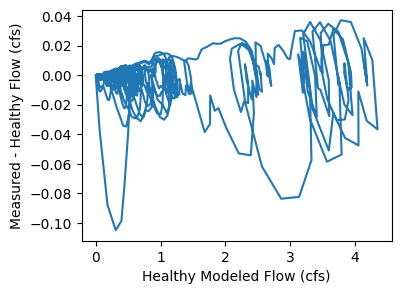

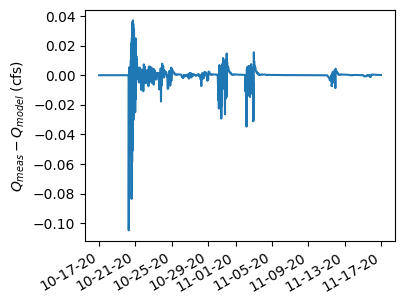

In [15]:
plot_link_id = 7
plot_node_id = 21

# Plot flow time series against each other.
fig, ax = plt.subplots(figsize=(4,3))
plot_df_model = output_df.loc[output_df[f'Link_{link_id}_n'] == 0.01, :]
plot_df_meas = output_df.loc[output_df[f'Link_{link_id}_n'] == 0.02, :]
plot_df_meas1 = output_df.loc[output_df[f'Link_{link_id}_n'] == 0.03, :]
ax.plot(plot_df_model[f'Flow_link_{plot_link_id}'], 
           plot_df_meas[f'Flow_link_{plot_link_id}'] - plot_df_model[f'Flow_link_{plot_link_id}'])
ax.set_xlabel('Healthy Modeled Flow (cfs)')
ax.set_ylabel('Measured - Healthy Flow (cfs)')

# Residual time series.
fig, ax = plt.subplots(figsize=(4,3))
# ax.plot(plot_df_model['datetime'], plot_df_meas1[f'Flow_link_{plot_link_id}'] - plot_df_model[f'Flow_link_{plot_link_id}'])
ax.plot(plot_df_model['datetime'], plot_df_meas[f'Flow_link_{plot_link_id}'] - plot_df_model[f'Flow_link_{plot_link_id}'])
ax.set_ylabel('$Q_{meas} - Q_{model}$ (cfs)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')